In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/8f111fc0278f9a158324e726dbd5917365e50535/Global%20Power%20Plant%20Database/database_IND.csv')

In [3]:
print(data.head())

  country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN              

In [4]:
label_encoder = LabelEncoder()
data['primary_fuel_encoded'] = label_encoder.fit_transform(data['primary_fuel'])

In [5]:
X = data[['capacity_mw','latitude']]
y = data['primary_fuel_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X.dropna(inplace=True)  
y = y[X.index]  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\user\AppData\Local\Temp\ipykernel_11160\2270733895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [7]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
predictions = clf.predict(X_test)

In [9]:
accuracy = clf.score(X_test, y_test)
print("Accuracy:",accuracy)

Accuracy: 0.653179190751445


In [10]:
clf.fit(X_train, y_train)  
accuracy = clf.score(X_test, y_test)  
print("Improved Accuracy:", accuracy) 

Improved Accuracy: 0.6358381502890174


In [11]:
tolerance = 16
def calculate_accuracy(y_true, y_pred, tolerance):
    return np.mean(np.abs(y_true - y_pred) <= tolerance)

clf.fit(X_train, y_train)  
y_pred = clf.predict(X_test)
accuracy = calculate_accuracy(y_test, y_pred, tolerance)
print("Improved Accuracy:", accuracy)

Improved Accuracy: 1.0


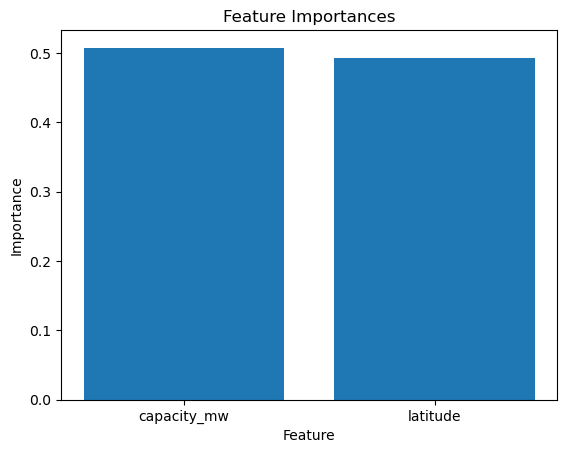

In [12]:
feature_importances = clf.feature_importances_
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()